# Object Detector
Goal: Build a object detection pipeline that can take in an image, determine what object it is of, then draw a bounding box and label on it.

Methodology:
1. Load test image
2. Load model
3. Classify test image
4. Determine bounding coordinates
5. Draw bounding coordindates
6. Draw label

In [1]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import seaborn as sns
import time

/home/peter/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# configure notebook
%matplotlib inline
sns.set()

# configure gpu
os.environ['CUDA_VISIBLE_DEVICES']='0'

## Variables

In [3]:
input_path = 'input_images/cup.jpg'

img_dim = 224

## Functions

In [4]:
def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [5]:
def make_predictions(preprocessed_batch):
    predictions = model.predict(preprocessed_batch)

    # decode the predictions
    decoded_predictions = decode_predictions(predictions, top=3)

    return decoded_predictions

In [6]:
def getPatches(columns, img, img_dim, rows):
    # create an array for the img patches
    patch_imgs = np.empty([1, img_dim, img_dim, 3])
    
    # create an array for the img coordinates
    patch_coords = np.empty([4])
    
    # calculate the start and end position of each patch
    for rowIndex in range(rows):
        for columnIndex in range(columns):
            # get coordinates
            startRowPixel = img_dim * rowIndex
            startColumnPixel = img_dim * columnIndex
            endRowPixel = (img_dim * (rowIndex + 1))
            endColumnPixel = (img_dim * (columnIndex + 1))

            # append to coords
            coords = np.array([startRowPixel, startColumnPixel, endColumnPixel, endRowPixel])
            patch_coords = np.vstack([patch_coords, coords])
            
            # get the image with the coordinates
            img = input_img_array[startRowPixel:endRowPixel, startColumnPixel:endColumnPixel]
            
            # append to imgs
            img = np.expand_dims(img, axis=0)
            patch_imgs = np.vstack([patch_imgs, img])
            
    # slice off the first patch since it's an empty placeholder
    patch_imgs = patch_imgs[1:]
    patch_coords = patch_coords[1:]
    
    return patch_imgs, patch_coords

In [7]:
def show_img_and_label(coords, img, labels):
    fig, ax = plt.subplots(1)
    ax.imshow(img / 255, cmap='gray')

    for index, label in enumerate(labels):
        # generate coords
        rect = patches.Rectangle((coords[index][0], coords[index][1]), coords[index][2] - 1 , coords[index][3] - 1 , linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # generate label
        detectedObject = label[0][1]
        detectedConfidence = label[0][2]
        detectedConfidenceFormatted = '{:.5f}'.format(detectedConfidence)
        plt.text(coords[index][0] + 8, coords[index][1] + 30, detectedObject)
        plt.text(coords[index][0] + 8, coords[index][1] + 60, detectedConfidenceFormatted)
        
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # save the fig
    # create timestamp
    currentTime = time.strftime("%Y%m%d-%H%M%S")
    fig.savefig('output_images/{}.jpg'.format(currentTime), bbox_inches='tight')

## Load Model

In [8]:
# Load the ResNet50 network
# requires input to be of shape (224, 224, 3)
model = ResNet50(weights='imagenet')

## Load Test Image

In [9]:
# calculate the number of columns, rows, and patches
rows = 2
columns = 2

In [10]:
# load and resize the input image to be twice as big
input_img_raw = image.load_img(input_path, target_size=(img_dim * rows, img_dim * columns))
input_img_array = image.img_to_array(input_img_raw)

## Create image patches

In [11]:
patch_imgs, patch_coords = getPatches(columns, input_img_array, img_dim, rows)

In [12]:
# preprocess the image patches
patch_imgs_preprocessed = preprocess_input(patch_imgs)

## Make a prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


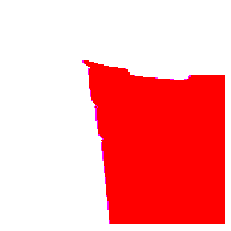

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


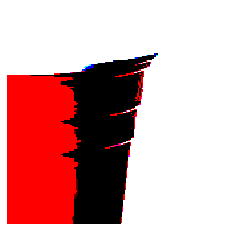

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


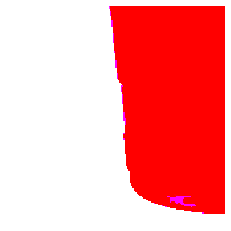

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


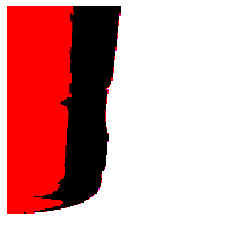

In [13]:
# show the preprocessed input image
for patch_img in patch_imgs:
    show_img(patch_img)

In [14]:
# make a prediction
decoded_predictions = make_predictions(patch_imgs_preprocessed)

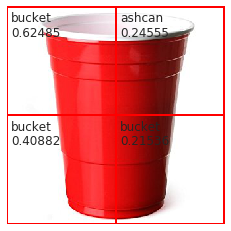

In [15]:
show_img_and_label(patch_coords, input_img_array, decoded_predictions)